# KNN & PCA – Theoretical Q&A

### 1. What is K-Nearest Neighbors (KNN) and how does it work?

KNN is a **non-parametric, lazy learning algorithm** used for classification and regression. It works by:

1. Storing the entire training dataset.
2. When a new input arrives, it calculates the **distance** to all training points.
3. Selects the **K closest points** (neighbors).
4. **Classification**: Returns the **majority label** among neighbors.
5. **Regression**: Returns the **mean or weighted average** of the neighbors' values.

---

### 2. What is the difference between KNN Classification and KNN Regression?

| Feature       | KNN Classification  | KNN Regression                      |
| ------------- | ------------------- | ----------------------------------- |
| Output        | Class label         | Continuous value                    |
| Decision Rule | Majority voting     | Average of neighbors' target values |
| Use Case      | Categorical targets | Numerical targets                   |

---

### 3. What is the role of the distance metric in KNN?

The **distance metric** determines how similarity is calculated between points. Common ones include:

* **Euclidean Distance**: For continuous features
* **Manhattan Distance**: Less sensitive to outliers
* **Minkowski Distance**: Generalized form
* **Cosine Similarity**: For high-dimensional sparse data

The choice of metric **affects the performance** and **decision boundaries** of the model.

---

### 4. What is the Curse of Dimensionality in KNN?

As the number of features (dimensions) increases:

* Data becomes **sparse**.
* **Distances become less meaningful**—all points appear equally far.
* KNN struggles because neighbors are harder to define accurately.

This reduces the **effectiveness and accuracy** of KNN in high-dimensional spaces.

---

### 5. How can we choose the best value of K in KNN?

* Try **odd values** to avoid ties (for classification).
* Use **Cross-validation** to evaluate different values of K.
* Small K: Low bias, high variance (may overfit).
* Large K: High bias, low variance (may underfit).

Plot **accuracy vs. K** to find the optimal balance.

---

### 6. What are KD Tree and Ball Tree in KNN?

Both are **data structures** used to **speed up nearest neighbor search**:

* **KD Tree (K-dimensional Tree)**: Efficient for **low-dimensional** numeric data.
* **Ball Tree**: Works better for **high-dimensional** and non-Euclidean spaces.

They help avoid comparing the query point with all training points.

---

### 7. When should you use KD Tree vs. Ball Tree?

| Tree Type | Use Case                         |
| --------- | -------------------------------- |
| KD Tree   | Low-dimensional numeric data     |
| Ball Tree | High-dimensional or complex data |

Scikit-learn will auto-select the best tree, but Ball Tree is often preferred when dimensions > 20.

---

### 8. What are the disadvantages of KNN?

* **Slow inference**: Needs to compute distance to all points at prediction time
* **Sensitive to noisy data and outliers**
* **Curse of dimensionality** reduces performance
* Requires **feature scaling**

---

### 9. How does feature scaling affect KNN?

KNN is **distance-based**, so features with larger scales dominate unless scaled properly.

Use:

* **Standardization (Z-score)**
* **Min-Max Normalization**

This ensures **fair contribution** from all features.

---

### 10. What is PCA (Principal Component Analysis)?

PCA is an **unsupervised dimensionality reduction** technique. It transforms the data into a new set of **orthogonal components** (principal components) that:

* Capture **maximum variance**
* Are **uncorrelated**
* Help in **reducing dimensions** while retaining most of the information

---

### 11. How does PCA work?

Steps in PCA:

1. **Standardize** the data.
2. Compute the **covariance matrix**.
3. Calculate **eigenvalues and eigenvectors**.
4. Sort eigenvectors by eigenvalues in descending order.
5. Project the data onto the selected top **k principal components**.

---

### 12. What is the geometric intuition behind PCA?

PCA rotates the original axes to **new orthogonal axes** (principal components):

* The **first principal component** captures the direction of **maximum variance**.
* Subsequent components capture decreasing variance.
* It’s like **finding new coordinates** that best summarize the spread of the data.

---

### 13. What is the difference between Feature Selection and Feature Extraction?

| Aspect           | Feature Selection            | Feature Extraction (e.g., PCA)         |
| ---------------- | ---------------------------- | -------------------------------------- |
| Approach         | Selects a subset of features | Creates new features from combinations |
| Dimensionality   | Reduced but original space   | Transformed into a new space           |
| Interpretability | More interpretable           | Less interpretable                     |

---

### 14. What are Eigenvalues and Eigenvectors in PCA?

* **Eigenvectors** define the **directions** (principal components).
* **Eigenvalues** define the **magnitude of variance** in those directions.

Higher eigenvalues indicate **more important components**.

---

### 15. How do you decide the number of components to keep in PCA?

Use:

* **Explained Variance Ratio**: Choose components that explain a desired % of variance (e.g., 95%)
* **Scree Plot**: Look for the "elbow" in the plot of variance vs. component number
* **Cumulative Variance Threshold**

---

### 16. Can PCA be used for classification?

Yes, PCA is often used **before classification**:

* Reduces dimensionality
* Improves speed
* May reduce overfitting

However, PCA does **not consider class labels**, so it doesn’t directly optimize classification performance.

---

### 17. What are the limitations of PCA?

* **Linear method**: Doesn’t capture non-linear relationships
* **Loss of interpretability**: Transformed features are hard to explain
* **Sensitive to scaling**
* May discard **useful discriminative information** (since it’s unsupervised)

---

### 18. How do KNN and PCA complement each other?

* PCA can **reduce dimensionality** and combat the **curse of dimensionality** in KNN.
* Helps improve **KNN accuracy** and **speed**.
* PCA should be applied **before** running KNN.

---

### 19. How does KNN handle missing values in a dataset?

KNN does **not natively handle missing values**. You must:

* **Impute missing values** before using KNN

  * Mean, Median, or KNN Imputer
* Alternatively, drop rows/columns if appropriate

---

### 20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?

| Aspect      | PCA                  | LDA                         |
| ----------- | -------------------- | --------------------------- |
| Type        | Unsupervised         | Supervised                  |
| Goal        | Maximize variance    | Maximize class separability |
| Uses labels | No                   | Yes                         |
| Output      | Principal components | Linear discriminants        |

---






# Practical Q&A

In [42]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.impute import KNNImputer # Import KNNImputer from sklearn.impute
from sklearn.metrics import (
    accuracy_score, mean_squared_error, precision_score, recall_score, f1_score,
    classification_report, roc_auc_score, roc_curve
)
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.datasets import make_regression, make_blobs

plt.rcParams["figure.figsize"] = (7,5); np.random.seed(42)


In [44]:
from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
    # Assuming the loaded file is the Breast Cancer dataset and the target column is 'diagnosis'
    bc = pd.read_csv(filename)
    print(f"{filename} loaded successfully.")
    display(bc.head())

# Define X and y from the loaded dataframe
# Drop the 'id' column as it's typically not used for modeling, and 'Unnamed: 32' is likely an empty column
X = bc.drop(['id', 'diagnosis'], axis=1)
y = bc['diagnosis'].map({'M': 1, 'B': 0}) # Convert diagnosis to numerical (M=1, B=0)

Saving data[1].csv to data[1] (3).csv
data[1] (3).csv loaded successfully.


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


1 — KNN Classifier on Breast-Cancer (accuracy)

In [50]:
# Define X and y from the loaded dataframe
# Drop the 'id' column as it's typically not used for modeling, and 'Unnamed: 32' is likely an empty column
X = bc.drop(['id', 'diagnosis'], axis=1)
y = bc['diagnosis'].map({'M': 1, 'B': 0}) # Convert diagnosis to numerical (M=1, B=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Added this line

knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train, y_train)
print("Accuracy (k=5):", round(accuracy_score(y_test, knn1.predict(X_test)),4))


Accuracy (k=5): 0.9561


2 — KNN Regressor on synthetic data (MSE)

In [51]:
Xs, ys = make_regression(n_samples=600, n_features=4, noise=15, random_state=42)
Xs_tr, Xs_te, ys_tr, ys_te = train_test_split(Xs, ys, random_state=42)
knn2 = KNeighborsRegressor(n_neighbors=7).fit(Xs_tr, ys_tr)
print("MSE (synthetic KNN-R):", round(mean_squared_error(ys_te, knn2.predict(Xs_te)),4))


MSE (synthetic KNN-R): 912.7417


3 — Distance metrics: Euclidean vs Manhattan

In [52]:
for metric in ["euclidean","manhattan"]:
    clf = KNeighborsClassifier(n_neighbors=5, metric=metric).fit(X_train, y_train)
    print(f"Accuracy ({metric}):", round(accuracy_score(y_test, clf.predict(X_test)),4))


Accuracy (euclidean): 0.9561
Accuracy (manhattan): 0.9474


4 — Different K values & decision boundaries (PCA 2-D)

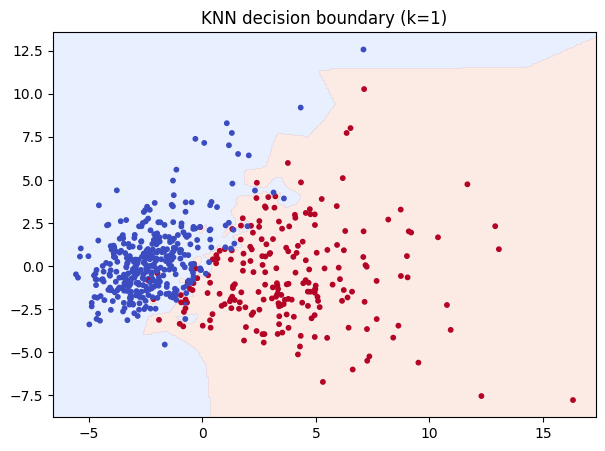

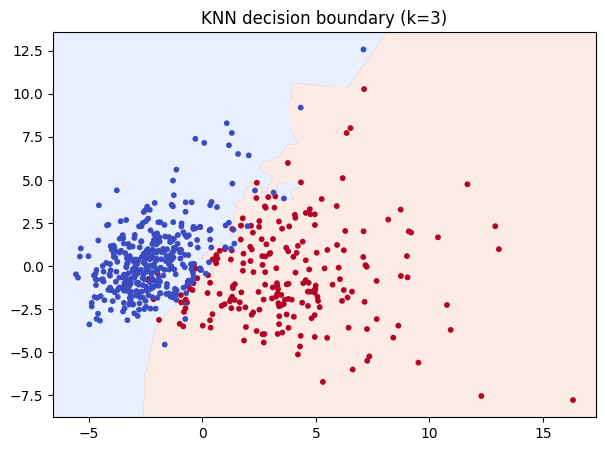

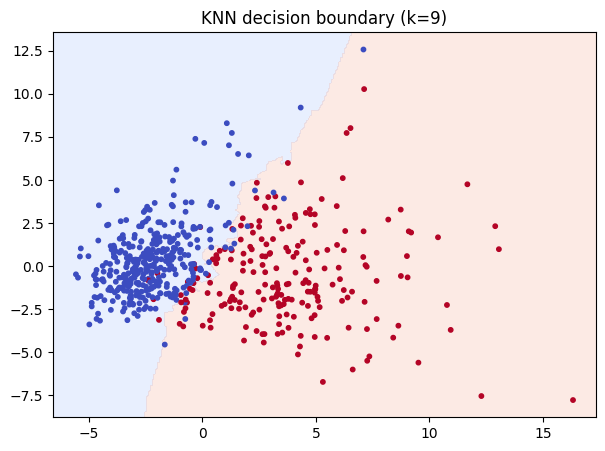

In [53]:
pca2 = PCA(n_components=2, random_state=42).fit_transform(StandardScaler().fit_transform(X))
Xs2, ys2 = pca2, y.to_numpy()

for k in [1,3,9]:
    model = KNeighborsClassifier(n_neighbors=k).fit(Xs2, ys2)
    xx, yy = np.meshgrid(np.linspace(Xs2[:,0].min()-1, Xs2[:,0].max()+1,300),
                         np.linspace(Xs2[:,1].min()-1, Xs2[:,1].max()+1,300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=.2, levels=[-0.5,0.5,1.5], cmap="coolwarm")
    plt.scatter(Xs2[:,0], Xs2[:,1], c=ys2, cmap="coolwarm", s=10)
    plt.title(f"KNN decision boundary (k={k})"); plt.show()


5 — Feature-scaling impact on KNN


In [54]:
unscaled = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
scaled_tr = StandardScaler().fit_transform(X_train); scaled_te = StandardScaler().fit(X_train).transform(X_test)
scaled  = KNeighborsClassifier(n_neighbors=5).fit(scaled_tr, y_train)
print("Accuracy (unscaled):", round(accuracy_score(y_test, unscaled.predict(X_test)),4))
print("Accuracy (scaled)  :", round(accuracy_score(y_test, scaled .predict(scaled_te)),4))


Accuracy (unscaled): 0.9561
Accuracy (scaled)  : 0.9474


6 — PCA on synthetic data (explained-variance ratio)

In [55]:
Xsyn, _ = make_blobs(n_samples=400, centers=5, n_features=6, random_state=42)
evr = PCA().fit(Xsyn).explained_variance_ratio_
print("Explained variance ratio:", np.round(evr,4))

Explained variance ratio: [0.5296 0.3079 0.1106 0.0403 0.0061 0.0055]


7 — PCA → KNN accuracy comparison

In [56]:
pca7 = PCA(n_components=10, random_state=42).fit(X_train)
Xp_tr, Xp_te = pca7.transform(X_train), pca7.transform(X_test)

knn_raw  = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
knn_pca  = KNeighborsClassifier(n_neighbors=5).fit(Xp_tr,   y_train)
print("Accuracy raw :", round(accuracy_score(y_test, knn_raw.predict(X_test)),4))
print("Accuracy PCA :", round(accuracy_score(y_test, knn_pca.predict(Xp_te )),4))


Accuracy raw : 0.9561
Accuracy PCA : 0.9561


8 — GridSearchCV hyper-tuning (KNN Classifier)

In [57]:
param = {"n_neighbors":[3,5,7,11], "weights":["uniform","distance"], "metric":["euclidean","manhattan"]}
grid = GridSearchCV(KNeighborsClassifier(), param, cv=5, scoring="accuracy", n_jobs=-1).fit(X_train, y_train)
print("Best params :", grid.best_params_)
print("Test accuracy:", round(accuracy_score(y_test, grid.best_estimator_.predict(X_test)),4))


Best params : {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Test accuracy: 0.9386


9 — Count of misclassified samples

In [58]:
pred9 = knn1.predict(X_test)
print("Misclassified samples:", np.sum(pred9 != y_test))


Misclassified samples: 5


10 — PCA cumulative explained variance (Breast-Cancer)

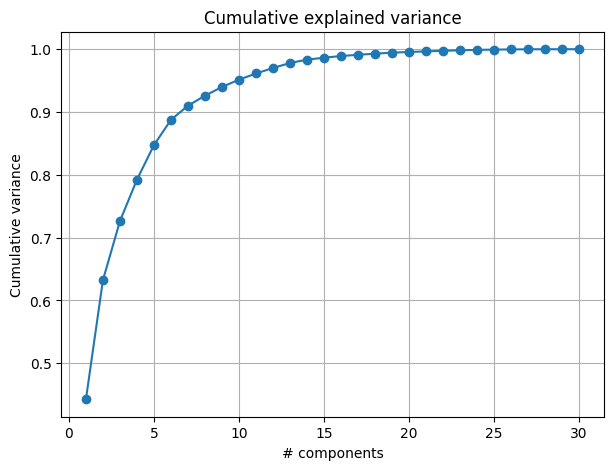

In [59]:
pca10 = PCA().fit(StandardScaler().fit_transform(X))
cumvar = np.cumsum(pca10.explained_variance_ratio_)
plt.plot(range(1,len(cumvar)+1), cumvar, marker="o"); plt.xlabel("# components"); plt.ylabel("Cumulative variance")
plt.title("Cumulative explained variance"); plt.grid(); plt.show()


11 — KNN weights: uniform vs distance

In [60]:
for w in ["uniform","distance"]:
    clf = KNeighborsClassifier(n_neighbors=5, weights=w).fit(X_train, y_train)
    print(f"Accuracy ({w}):", round(accuracy_score(y_test, clf.predict(X_test)),4))


Accuracy (uniform): 0.9561
Accuracy (distance): 0.9561


12 — KNN Regressor: effect of different K (synthetic)

In [61]:
Xs12, ys12 = make_regression(n_samples=500, n_features=3, noise=20, random_state=42)
for k in [1,3,5,9]:
    reg = KNeighborsRegressor(n_neighbors=k).fit(Xs12, ys12)
    mse = mean_squared_error(ys12, reg.predict(Xs12))
    print(f"k={k}  →  MSE={round(mse,4)}")


k=1  →  MSE=0.0
k=3  →  MSE=416.1455
k=5  →  MSE=524.2124
k=9  →  MSE=656.4178


13 — KNN Imputation for missing values

In [62]:
Xmiss = X.copy()
mask = np.random.rand(*Xmiss.shape) < .05  # 5 % random NaNs
Xmiss[mask] = np.nan
imp = KNNImputer(n_neighbors=3).fit_transform(Xmiss)
print("NaNs after imputation:", np.isnan(imp).sum())


NaNs after imputation: 0


14 — PCA projection (first two PCs)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


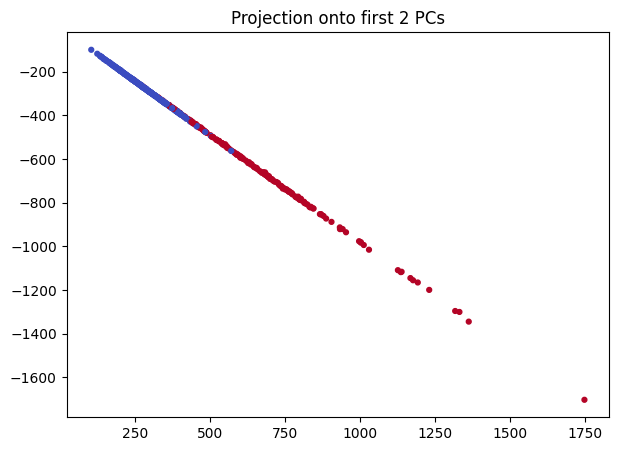

In [63]:
pca14 = PCA(n_components=2, random_state=42).fit(StandardScaler().fit_transform(X))
proj = pca14.transform(X)
plt.scatter(proj[:,0], proj[:,1], c=y, cmap="coolwarm", s=12)
plt.title("Projection onto first 2 PCs"); plt.show()


15 — KD-Tree vs Ball-Tree algorithms


In [64]:
for algo in ["kd_tree","ball_tree"]:
    clf = KNeighborsClassifier(algorithm=algo, n_neighbors=5).fit(X_train, y_train)
    print(f"Accuracy ({algo}):", round(accuracy_score(y_test, clf.predict(X_test)),4))


Accuracy (kd_tree): 0.9561
Accuracy (ball_tree): 0.9561


16 — High-dim Scree plot (Breast-Cancer PC variances)

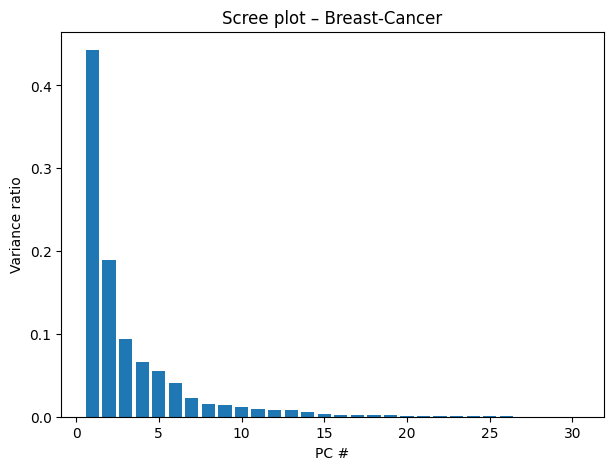

In [65]:
vari = pca10.explained_variance_ratio_
plt.bar(range(1,len(vari)+1), vari); plt.xlabel("PC #"); plt.ylabel("Variance ratio")
plt.title("Scree plot – Breast-Cancer"); plt.show()


17 — Precision, Recall, F1-Score

In [66]:
pred17 = knn1.predict(X_test)
print(classification_report(y_test, pred17, target_names=["Benign","Malignant"]))


              precision    recall  f1-score   support

      Benign       0.93      1.00      0.97        71
   Malignant       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



18 — Effect of #PCs on accuracy

In [67]:
for n in [5,10,15,20,30]:
    p = PCA(n_components=n, random_state=42).fit(X_train)
    Xt_tr, Xt_te = p.transform(X_train), p.transform(X_test)
    acc = accuracy_score(y_test, KNeighborsClassifier(5).fit(Xt_tr, y_train).predict(Xt_te))
    print(f"{n:2d} PCs → acc={round(acc,4)}")


 5 PCs → acc=0.9561
10 PCs → acc=0.9561
15 PCs → acc=0.9561
20 PCs → acc=0.9561
30 PCs → acc=0.9561


19 — leaf_size sweep (KNN Classifier)

In [68]:
for leaf in [10,20,40,60]:
    clf = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf).fit(X_train, y_train)
    print(f"leaf_size={leaf:2d} → acc={round(accuracy_score(y_test, clf.predict(X_test)),4)}")


leaf_size=10 → acc=0.9561
leaf_size=20 → acc=0.9561
leaf_size=40 → acc=0.9561
leaf_size=60 → acc=0.9561


20 — Before-vs-after PCA scatter

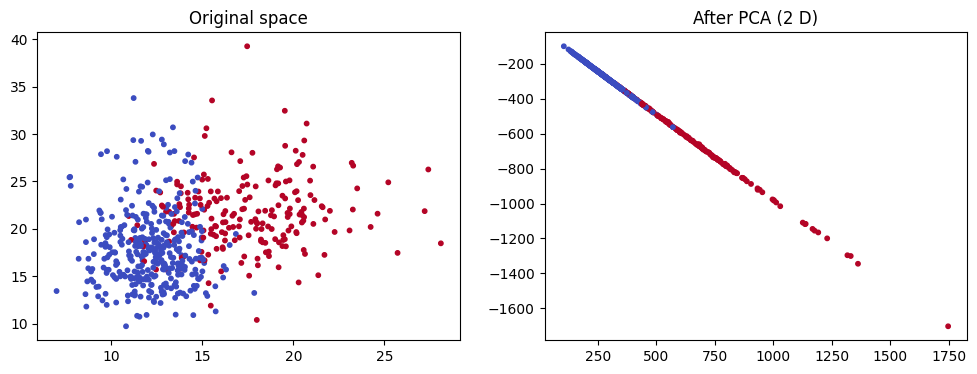

In [69]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
axs[0].scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap="coolwarm", s=10)
axs[0].set_title("Original space")
axs[1].scatter(proj[:,0], proj[:,1], c=y, cmap="coolwarm", s=10)
axs[1].set_title("After PCA (2 D)")
plt.show()


21 — “Real-world” report (Breast Cancer)

In [70]:
print("Classification report – Breast Cancer:\n",
      classification_report(y_test, knn1.predict(X_test), target_names=["Benign","Malignant"]))


Classification report – Breast Cancer:
               precision    recall  f1-score   support

      Benign       0.93      1.00      0.97        71
   Malignant       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



22 — KNN-R distance metrics (synthetic)

In [71]:
for m in ["euclidean","manhattan"]:
    reg = KNeighborsRegressor(n_neighbors=7, metric=m).fit(Xs12, ys12)
    mse = mean_squared_error(ys12, reg.predict(Xs12))
    print(f"MSE ({m}):", round(mse,4))


MSE (euclidean): 601.6052
MSE (manhattan): 630.1221


23 — ROC-AUC score (binary)

ROC-AUC: 0.9959


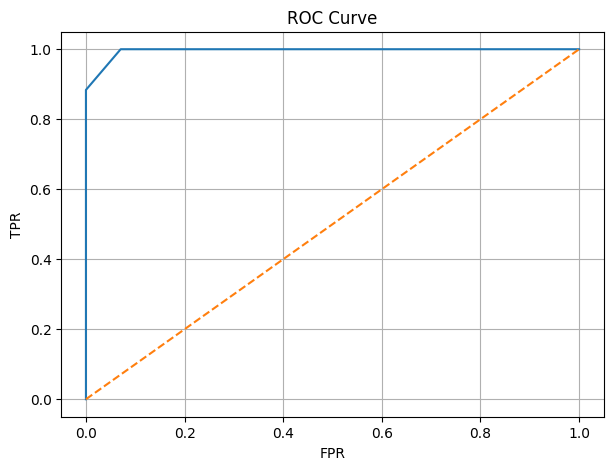

In [72]:
proba = knn1.predict_proba(X_test)[:,1]
print("ROC-AUC:", round(roc_auc_score(y_test, proba),4))
fpr, tpr, _ = roc_curve(y_test, proba)
plt.plot(fpr, tpr); plt.plot([0,1],[0,1],'--'); plt.xlabel("FPR"); plt.ylabel("TPR")
plt.title("ROC Curve"); plt.grid(); plt.show()


24 — Variance captured by each PC (bar)

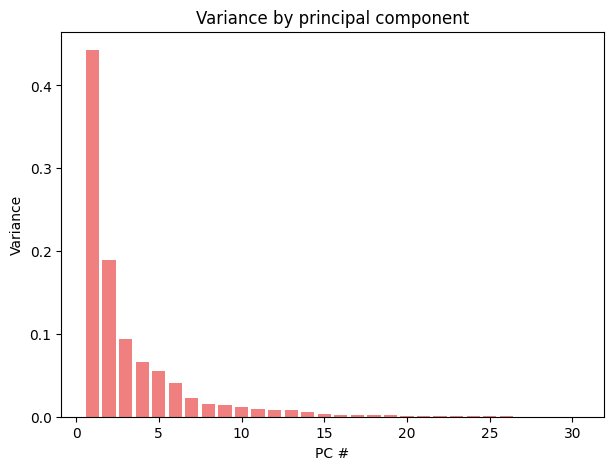

In [73]:
plt.bar(range(1,len(vari)+1), vari, color="lightcoral"); plt.xlabel("PC #"); plt.ylabel("Variance")
plt.title("Variance by principal component"); plt.show()


25 — Feature-selection before KNN

In [74]:
sel = SelectKBest(score_func=f_classif, k=10).fit(X_train, y_train)
Xsel_tr, Xsel_te = sel.transform(X_train), sel.transform(X_test)
acc_sel = accuracy_score(y_test, KNeighborsClassifier(5).fit(Xsel_tr, y_train).predict(Xsel_te))
print("Accuracy after SelectKBest(10):", round(acc_sel,4))


Accuracy after SelectKBest(10): 0.9474


26 — PCA reconstruction error

In [75]:
pca26 = PCA(n_components=15, random_state=42).fit(StandardScaler().fit_transform(X))
X_red   = pca26.transform(StandardScaler().fit_transform(X))
X_back  = pca26.inverse_transform(X_red)
recon_mse = np.mean((StandardScaler().fit_transform(X) - X_back)**2)
print("Reconstruction MSE (15 PCs):", round(recon_mse,5))



Reconstruction MSE (15 PCs): 0.01351


27 — Decision boundary (two PCs) – re-plot

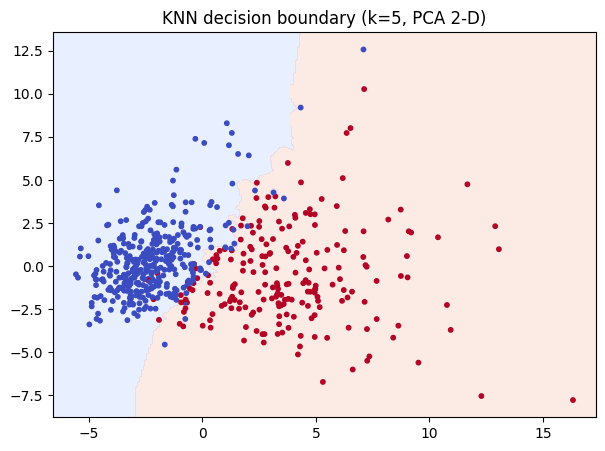

In [76]:
model27 = KNeighborsClassifier(5).fit(Xs2, ys2)
xx, yy = np.meshgrid(np.linspace(Xs2[:,0].min()-1, Xs2[:,0].max()+1,300),
                     np.linspace(Xs2[:,1].min()-1, Xs2[:,1].max()+1,300))
Z = model27.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=.2, levels=[-0.5,0.5,1.5], cmap="coolwarm")
plt.scatter(Xs2[:,0], Xs2[:,1], c=ys2, cmap="coolwarm", s=10)
plt.title("KNN decision boundary (k=5, PCA 2-D)"); plt.show()



28 — Data-variance vs #PCs (again, explicit plot)

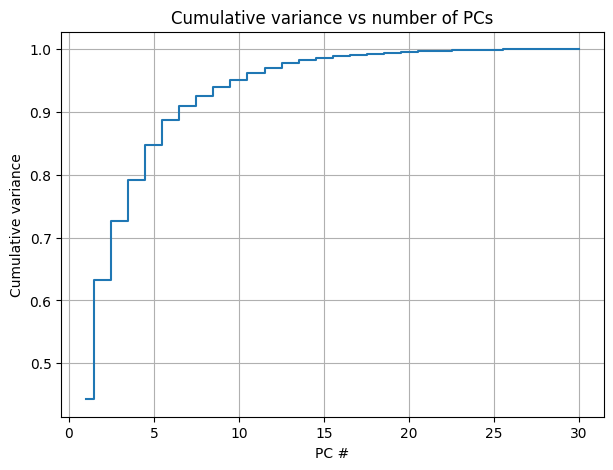

In [77]:
cum = np.cumsum(vari)
plt.step(range(1,len(cum)+1), cum, where="mid"); plt.xlabel("PC #"); plt.ylabel("Cumulative variance")
plt.title("Cumulative variance vs number of PCs"); plt.grid(); plt.show()
